<a href="https://colab.research.google.com/github/quratarayuni/final-task-credit-risk-prediction/blob/main/final_task_credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**📘 1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

**📂 2. Load Dataset**

In [ ]:
url = 'https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv'
df = pd.read_csv(url)
print("Jumlah baris dan kolom:", df.shape)
df.head()


/tmp/ipython-input-2070815957.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Jumlah baris dan kolom: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**📊 3. Data Understanding**

In [ ]:
print("Ukuran data:", df.shape)
print(df.info())
df.describe(include='all')

Ukuran data: (466285, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


**🔍 4. Exploratory Data Analysis (EDA)**

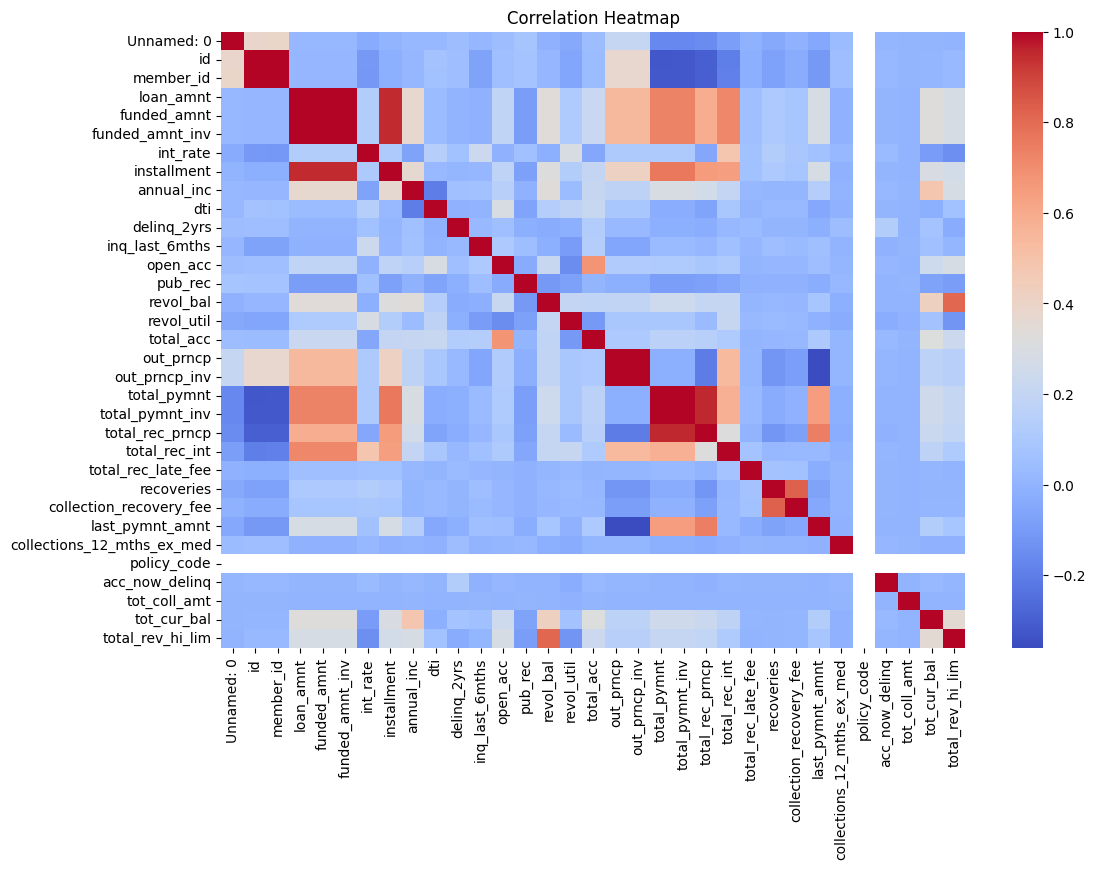

In [ ]:
df_corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

**🧪 5. Feature Engineering**

In [ ]:
# 5.1. Encoding dan Scaling
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('loan_status', axis=1))
X = pd.DataFrame(X_scaled, columns=df.drop('loan_status', axis=1).columns)
y = df['loan_status']

**🧹 6. Data Preparation**

In [ ]:
# 6.1. Ubah loan_status ke label GOOD/BAD
df['loan_status'] = df['loan_status'].apply(lambda x: 'GOOD' if x in ['Fully Paid', 'Current'] else 'BAD')

# 6.2. Drop kolom dengan >20% missing dan baris kosong
df = df.dropna(axis=1, thresh=len(df)*0.8)
df = df.dropna()

# 6.3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**🤖 7. Modeling**

In [ ]:
# 7.1. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
# 7.2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**📈 8. Evaluation**

In [ ]:
# 8.1. Logistic Regression
from sklearn.metrics import classification_report, roc_auc_score

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg))

# Cek apakah label sudah dalam bentuk 0/1
if y_test.dtype == 'object':
    y_test_binary = y_test.map({'GOOD': 1, 'BAD': 0})
else:
    y_test_binary = y_test

print("ROC-AUC:", roc_auc_score(y_test_binary, logreg.predict_proba(X_test)[:,1]))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      8254
           1       0.97      1.00      0.99     66179

    accuracy                           0.97     74433
   macro avg       0.98      0.89      0.93     74433
weighted avg       0.98      0.97      0.97     74433

ROC-AUC: 0.9469184622465114


In [ ]:
# 8.2. Random Forest
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))

# Cek apakah y_test masih berupa string atau sudah 0/1
if y_test.dtype == 'object':
    y_test_binary = y_test.map({'GOOD': 1, 'BAD': 0})
else:
    y_test_binary = y_test

print("ROC-AUC:", roc_auc_score(y_test_binary, rf.predict_proba(X_test)[:,1]))


Random Forest
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      8254
           1       0.98      1.00      0.99     66179

    accuracy                           0.98     74433
   macro avg       0.99      0.93      0.96     74433
weighted avg       0.98      0.98      0.98     74433

ROC-AUC: 0.9848742909239336
